In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import os
from PIL import Image
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

moved all test images into train folder since we can just split them into train and test anyway

In [32]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/project/ECS171/images/')
ds_train = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/project/ECS171/images/',
            validation_split=0.2, subset = 'training', seed = 123)
ds_val = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/project/ECS171/images/',
            validation_split=0.2, subset = 'validation', seed = 123)

Found 4320 files belonging to 2 classes.
Found 4320 files belonging to 2 classes.
Using 3456 files for training.
Found 4320 files belonging to 2 classes.
Using 864 files for validation.


In [30]:
import tensorflow_datasets as tfds
batch_size = 64

dataset_name = dataset
class_names = dataset.class_names
print(class_names)

['chihuahua', 'muffin']


In [ ]:
size = (640,640)  #size of images
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_val = ds_val.map(lambda image, label: (tf.image.resize(image, size), label))

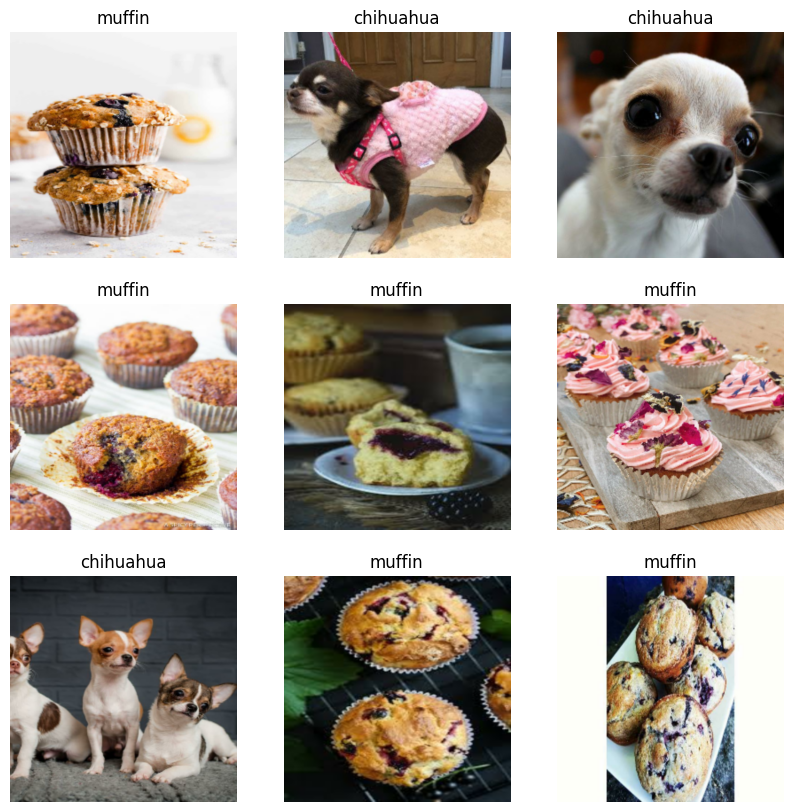

In [38]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):    #display 9 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")